In [ ]:
import keras 
import tensorflow as tf
import numpy as np
import numba as nb
from PIL import Image
import matplotlib.pyplot as plt
import os


In [ ]:
def showImage(im):
    im = np.array(im)
    if(len(im.shape)==1):
        plt.imshow([im],cmap = plt.cm.binary)
        return
    plt.imshow(im)


In [ ]:
# file_airplane = os.listdir(r"/Users/seanyao/cs/captcha solver/hcaptcha-dataset-main/airplane")
vehicles_names = ["airplane", "bicycle", "boat", "motorbus", "motorcycle", "train", "truck"]
def initImages(vehicleName, pos):
    vehicle = []
    vehicle_label = np.zeros(7)
    vehicle_label[pos] = 1
    path_name = "/Users/seanyao/cs/captcha solver/hcaptcha-dataset-main/" + str(vehicleName) +"/"
    for i,file in enumerate(os.listdir(r""+path_name)):
        im = Image.open("hcaptcha-dataset-main/" + str(vehicleName) + "/" + file)
        vehicle.append((im.resize((128,128)), vehicle_label))
    return (vehicle)

def initialize_images_labels(vehicles):
    train_images, train_labels = [], []
    for i,vehicle in enumerate(vehicles):
        for im,label in initImages(vehicle, i):
            train_images.append(im)
            train_labels.append(label)
    return train_images, train_labels

def get_label(output):
    return vehicles_names[np.where(output==1)[0][0]]

In [ ]:
train_images_unmixed, train_labels_unmixed = initialize_images_labels(vehicles_names)

In [ ]:
mixed_list_len = len(train_images_unmixed)
mixed_list = np.random.permutation(np.arange((mixed_list_len)))

images, labels = np.array([train_images_unmixed[i] for i in mixed_list]), np.array([train_labels_unmixed[i] for i in mixed_list])

from keras.utils import to_categorical
# labels = to_categorical(labels)

train_labels, test_labels = labels[0:3600], labels[3600:3713]
train_images, test_images = images[0:3600], images[3600:3713]

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255


In [ ]:
print(train_images.shape)


In [ ]:
from keras import layers
from keras import models
from keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)

model = models.Sequential()
model.add(layers.Conv2D(20, (5,5), activation='relu', input_shape = (128,128,3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())

# model.add(layers.Dense(64, activation='relu'))    
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()


In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=6,batch_size=100)

In [ ]:
model.evaluate(test_images, test_labels)[1]

In [118]:
def get_predicted_label(arr):
    return vehicles_names[np.argmax(arr)]

In [112]:
a = model.predict(test_images[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


predicted label:motorbus


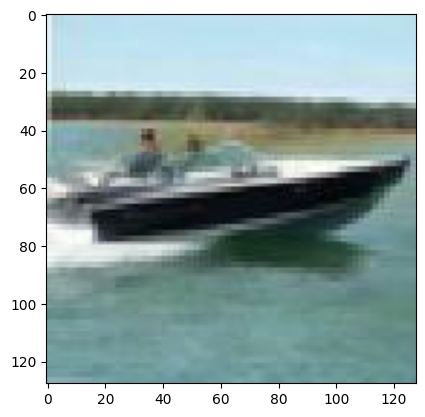

In [120]:

showImage(test_images[2])
print("predicted label:" + get_predicted_label(a[2]))